<a href="https://colab.research.google.com/github/ibrahim10sy/learn-python/blob/main/clustering_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering K-means**

**Objectifs**

* Utiliser le clustering K-means de Scikit-Learn pour regrouper des données
* Appliquer le clustering K-means à des données réelles pour la segmentation client

**Introduction**

La méthode K-means est largement utilisée pour le clustering dans de nombreuses applications de science des données. Elle est particulièrement utile pour extraire rapidement des informations à partir de données non étiquetées.

Les applications concrètes de la méthode K-means incluent :

* Segmentation de la clientèle
* Comprendre les objectifs des visiteurs d'un site web
* Reconnaissance de formes
* Ingénierie des caractéristiques
* Compression des données

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install plotly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

K-Means sur un ensemble de données synthétiques
Créons notre propre ensemble de données pour cet atelier !

Tout d'abord, nous devons définir une valeur de départ aléatoire. Utilisez la fonction random.seed() de numpy, où la valeur de départ sera 0.

In [2]:
np.random.seed(0)

Nous allons ensuite créer des clusters aléatoires de points à l'aide de la classe make_blobs. Cette classe peut accepter de nombreuses entrées, mais nous utiliserons celles-ci en particulier.


**Input**

* n_samples : Nombre total de points répartis équitablement entre les clusters.

* Valeur : 5 000

* centres : Nombre de centres à générer, ou emplacements fixes des centres.

* Valeur : [[4, 4], [-2, -1], [2, -3], [1,1]]

* cluster_std : Écart type des clusters.
* Valeur : 0,9

**Output**

* X : Tableau de forme [n_samples, n_feauture]. (Matrice de caractéristiques)

Échantillons générés.

* y : Tableau de forme [n_samples]. (Vecteur de réponse)
Libellés entiers d'appartenance aux clusters de chaque échantillon.

In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [9]:
X

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       ...,
       [ 3.29772603,  4.24400152],
       [-1.69503125, -0.29979681],
       [-1.64362141,  0.63035513]])

In [19]:
y.shape

(5000,)

In [11]:
X[:, 0]

array([-1.82150565,  2.16732621,  0.8465158 , ...,  3.29772603,
       -1.69503125, -1.64362141])

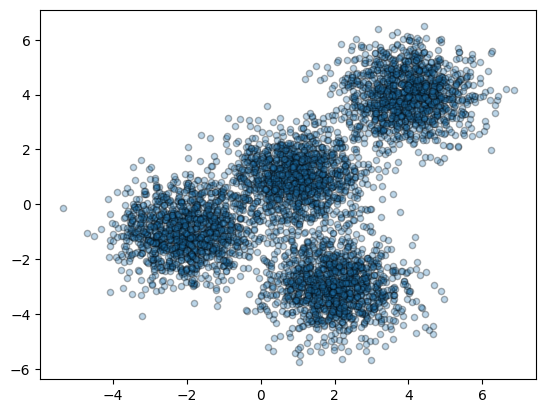

In [16]:
plt.scatter(X[:, 0], X[:, 1], marker='.',alpha=0.3,ec='k',s=80)

# **Configuration du clustering k-means**

Maintenant que nous disposons de nos données aléatoires, configurons notre clustering k-means.
La classe KMeans possède de nombreux paramètres, mais nous utiliserons les trois suivants :

init : Méthode d'initialisation des centroïdes.

La valeur sera : k-means++

k-means++ : Sélectionne les centres de cluster initiaux pour le clustering k-means de manière intelligente afin d'accélérer la convergence.

n_clusters : Nombre de clusters à former et nombre de centroïdes à générer.
La valeur sera : 4 (puisque nous avons 4 centres).

n_init : Nombre d'exécutions de l'algorithme k-means avec différentes valeurs de départ des centroïdes. Le résultat final sera le meilleur résultat de n_init exécutions consécutives en termes d'inertie.

La valeur sera : 12

Initialisez KMeans avec ces paramètres, où la variable de sortie est appelée k_means.

In [33]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [28]:
k_means

KMeans(n_clusters=3, n_init=12)

In [29]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

Obtenons maintenant l'étiquette de chaque point du modèle à l'aide de l'attribut k_means.labels_ et enregistrons-les sous le nom k_means_labels.

In [30]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 2, 2, ..., 0, 1, 1], dtype=int32)

Nous obtiendrons également les coordonnées des centres de cluster en utilisant k_means.cluster_centers_ et les enregistrerons sous k_means_cluster_centers.

In [31]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3.70503248,  3.70030577],
       [-0.8042542 , -0.16952334],
       [ 2.02030226, -2.94614399]])

Création du graphique visuel

Maintenant que les données aléatoires sont générées et que le modèle k-means est initialisé

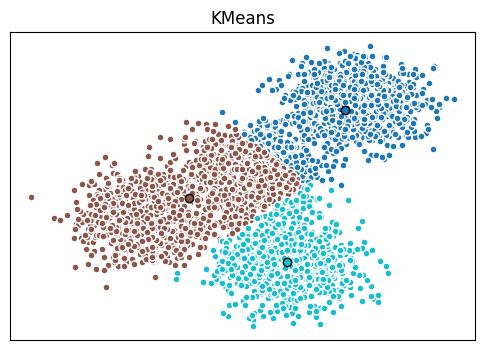

In [32]:
# Initialiser la figure
fig = plt.figure(figsize=(6, 4))

# Colors utilise une palette de couleurs, qui produit un tableau de couleurs en fonction du nombre d'étiquettes. Nous utilisons set(k_means_labels) pour obtenir les étiquettes uniques.

colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Création du graphique

ax = fig.add_subplot(1, 1, 1)

# Boucle For qui trace les points de données et les centroïdes.
# k sera compris entre 0 et 3, ce qui correspondra aux clusters possibles dans lesquels se trouve chaque point de données.

for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

  # Créez une liste de tous les points de données, où les points de données qui sont
# dans le cluster (ex. cluster 0) sont étiquetés comme vrais, sinon ils sont étiquetés comme faux.

    my_members = (k_means_labels == k)

    # Définition du controîde
    cluster_center = k_means_cluster_centers[k]

    # Graphique avec les couleurs de point de donnée.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Couleur du controîde
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Titre
ax.set_title('KMeans')

# Suppression du ticket
ax.set_xticks(())

# Suppression du ticket y
ax.set_yticks(())


plt.show()

k = 3

In [43]:
def test_k(k):
  k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
  k_means.fit(X)
  k_means_labels = k_means.labels_
  k_means_cluster_centers = k_means.cluster_centers_
  fig = plt.figure(figsize=(6, 4))

  colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

  ax = fig.add_subplot(1, 1, 1)

  for k, col in zip(range(len(k_means.cluster_centers_)), colors):

      my_members = (k_means_labels == k)

      cluster_center = k_means_cluster_centers[k]

      ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

      ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

  ax.set_title('KMeans')

  ax.set_xticks(())


  ax.set_yticks(())


  plt.show()

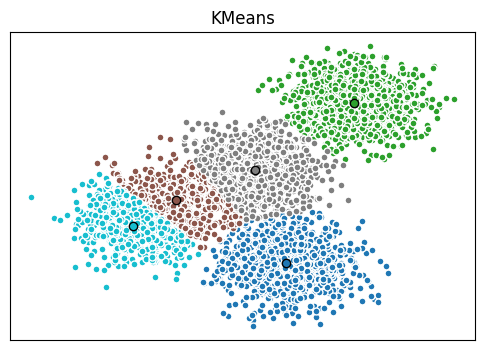

In [44]:
test_k(5)

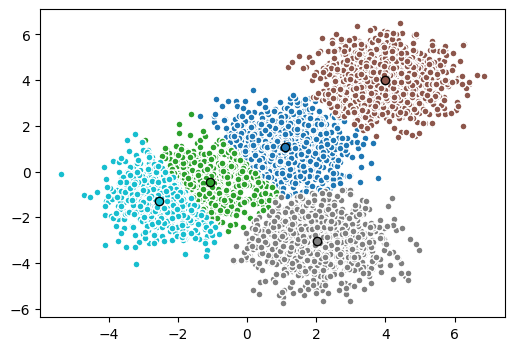

In [42]:
k_means3 = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()